### Load  Python libraries

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
plt.style.use('dark_background')
%matplotlib inline

### Setting the printing precision to 2

In [2]:
np.set_printoptions(precision=2)

### Import the TensorFlow library and Keras module and Checking Its version

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.15.0'

### Mount Google Drive if running in Colab

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


### Load diabetes dataset using the Pandas library

In [6]:
## Load diabetes data
df= pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/diabetes_regression.csv',
                header = 0)

print('Diabetes dataset')
print('-----------')
print('Initial number of samples = %d'%(df.shape[0]))
print('Initial number of features = %d\n'%(df.shape[1]))
df.head(5)

Diabetes dataset
-----------
Initial number of samples = 442
Initial number of features = 11



,AGE,GENDER,BMILEVEL,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,unhealthy,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,healthy,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,unhealthy,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,overweight,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,healthy,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Separating Categorical and Continuous Featues Using Axis = 1

In [7]:
## Create lists of ordinal, categorical, and continuous features
categorical_features =  ['GENDER', 'BMILEVEL']
#categorical_features =  ['GENDER']
continuous_features = df.drop(categorical_features, axis = 1).columns.tolist()
print(categorical_features)
print(continuous_features)

['GENDER', 'BMILEVEL']
['AGE', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']


### Changing the dtype of Categorical variables to 'category'

In [8]:
print('----------------------Before Changing--------------------------')
print(df.dtypes)
df[categorical_features] = df[categorical_features].astype('category')
print('----------------------After Changing---------------------------')
df.dtypes

----------------------Before Changing--------------------------
AGE           int64
GENDER        int64
BMILEVEL     object
BP          float64
S1            int64
S2          float64
S3          float64
S4          float64
S5          float64
S6            int64
Y             int64
dtype: object
----------------------After Changing---------------------------


AGE            int64
GENDER      category
BMILEVEL    category
BP           float64
S1             int64
S2           float64
S3           float64
S4           float64
S5           float64
S6             int64
Y              int64
dtype: object

### Remove the target variable column ('Y') from the list of continuous features

In [9]:
## Remove the target variable column from the list of continuous features
continuous_features.remove('Y')
continuous_features

['AGE', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

### Train-Tesr Splitting Using Sklearn's train_test_split module and here a 80-20 split is used

In [10]:
X = df.drop('Y', axis = 1) # This is the Independent variable part
y = df['Y'] # This is the dependent variable part
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1)

num_features = X_train.shape[0]
num_samples = X_train.shape[1]

print('Diabetes data set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))

Diabetes data set
---------------------
Number of training samples = 10
Number of features = 353


### Build pipeline for categorical and continuous features and Scaling them

In [11]:
# Pipeline object for categorical (features
categorical_transformer = Pipeline(steps = [('onehotenc', OneHotEncoder(handle_unknown = 'ignore'))])

# Pipeline object for continuous features
continuous_transformer = Pipeline(steps = [('scaler', RobustScaler())])

# Create a preprocessor object for all features
preprocessor = ColumnTransformer(transformers = [('continuous', continuous_transformer, continuous_features),
                                                 ('categorical', categorical_transformer, categorical_features)
                                                ],
                                 remainder = 'passthrough'
                                 )

### Apply preprocessor (fit and transform) to train data followed by transform to test data

In [12]:
## Fit and transform train data using preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform test data using preprocessor
X_test_transformed = preprocessor.transform(X_test)

### Define neural network architecture for regression (3 layer NN; 8 nodes, 8 nodes followed by 1 node)

In [14]:
# Define 3 layer neural network architecture
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train_transformed.shape[1], ),
                 kernel_regularizer = keras.regularizers.l2(l=0.1)), # First Hidden Layer Dense + Activation
    layers.Dense(8,kernel_regularizer = keras.regularizers.l2(l=0.1)), # Second Hidden Layer
    layers.Dense(1, kernel_regularizer = keras.regularizers.l2(l=0.1))
])

### Compile the neural network model


In [15]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-04)
model.compile(optimizer = opt , loss = 'mean_squared_error')

### Train the model

In [16]:
history = model.fit(X_train_transformed, Y_train, epochs = 1000,
                    batch_size = 32,validation_data=(X_test_transformed, Y_test))

Epoch 1/1000
12/12 [==============================] - 2s 22ms/step - loss: 29704.6230 - val_loss: 27065.8730
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 29695.0586 - val_loss: 27057.8535
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 29685.9746 - val_loss: 27049.7676
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 29676.5859 - val_loss: 27041.7227
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 29667.2832 - val_loss: 27033.5957
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 29657.7500 - val_loss: 27025.0176
Epoch 7/1000
12/12 [==============================] - 0s 6ms/step - loss: 29648.4004 - val_loss: 27016.9043
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 29638.9199 - val_loss: 27008.8320
Epoch 9/1000
12/12 [==============================] - 0s 5ms/step - loss: 29629.8164 - val_loss: 27000.7812
Epoch 10/1000
12/12 [======

### Plot train and test loss as a function of epoch

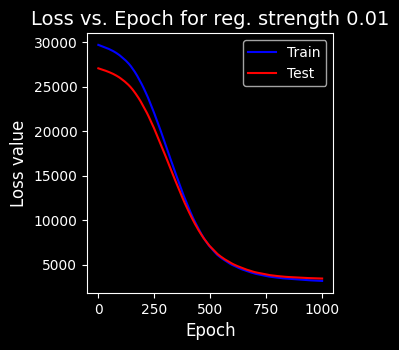

In [17]:
# Plot train and test loss as a function of epoch:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.plot( history.history['loss'], 'b', label = 'Train')
ax.plot( history.history['val_loss'], 'r', label = 'Test')
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Loss value', fontsize = 12)
ax.legend()
ax.set_title('Loss vs. Epoch for reg. strength 0.01', fontsize = 14);

### Compare the true and predicted values

In [18]:
## Compare the true and predicted values
np.column_stack((Y_test, model.predict(X_test_transformed)))

3/3 [==============================] - 0s 4ms/step


array([[ 78.  , 116.45],
       [152.  ,  85.94],
       [200.  , 160.46],
       [ 59.  ,  68.61],
       [311.  , 188.09],
       [178.  , 192.54],
       [332.  , 205.29],
       [132.  , 125.28],
       [156.  , 148.67],
       [135.  , 135.16],
       [220.  , 201.41],
       [233.  , 204.71],
       [ 91.  ,  91.63],
       [ 51.  ,  60.72],
       [195.  , 231.07],
       [109.  , 194.93],
       [217.  , 194.69],
       [ 94.  , 106.13],
       [ 89.  , 140.99],
       [111.  , 168.92],
       [129.  , 210.73],
       [181.  ,  89.35],
       [168.  , 141.81],
       [ 97.  ,  93.52],
       [115.  ,  99.29],
       [202.  , 196.36],
       [ 84.  ,  69.57],
       [147.  , 155.19],
       [253.  , 167.05],
       [144.  , 198.47],
       [262.  , 178.66],
       [115.  , 149.13],
       [ 68.  , 175.96],
       [ 65.  ,  68.13],
       [252.  , 156.73],
       [212.  , 200.64],
       [142.  , 102.87],
       [215.  , 238.84],
       [180.  , 170.97],
       [163.  , 202.8 ],
